<a href="https://colab.research.google.com/github/Ishita-Si/BlazeTrack/blob/main/Data_Cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("phylake1337/fire-dataset")

print("Path to dataset files:", path)

100%|██████████| 387M/387M [00:03<00:00, 123MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1


In [ ]:
import os

base_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1"
for root, dirs, files in os.walk(base_path):
    for file in files:
        print(os.path.join(root, file))



/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.351.png
/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.699.png
/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.122.png
/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.726.png
/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.92.png
/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.373.png
/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.599.png
/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.709.png
/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.341.png
/root/.cache/kagglehub/datasets/phylake1337/fir

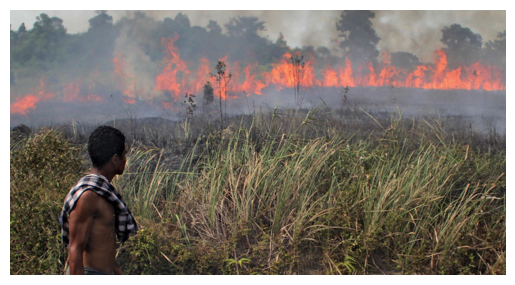

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.1.png"

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()


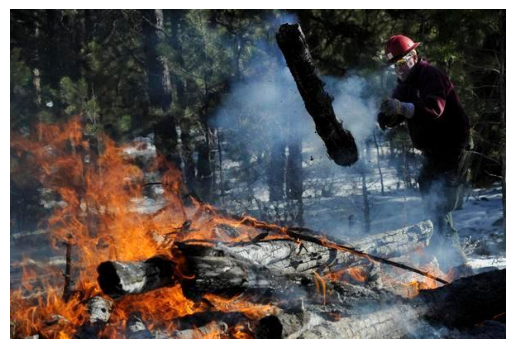

In [ ]:
img_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/fire_images/fire.25.png"

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()


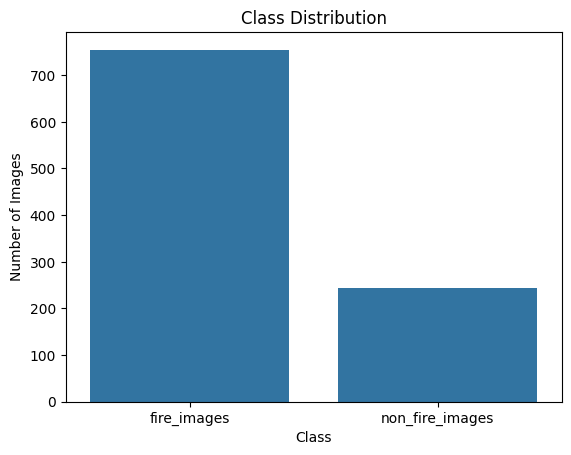

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

base_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset"
classes = ['fire_images', 'non_fire_images']

counts = {cls: len(os.listdir(os.path.join(base_path, cls))) for cls in classes}

sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()



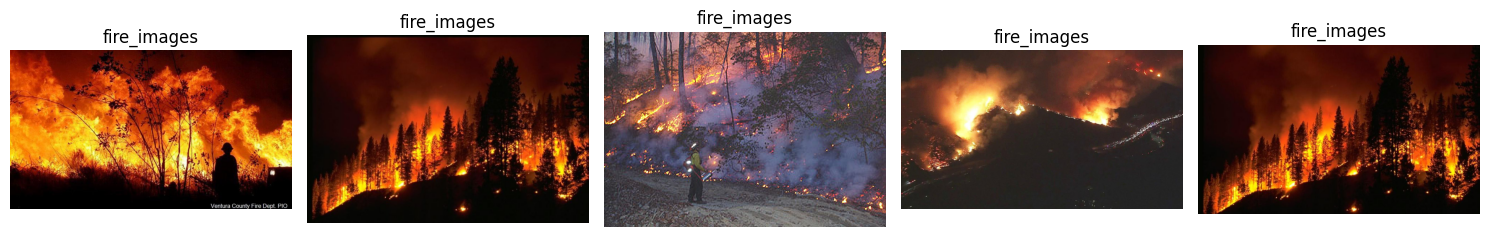

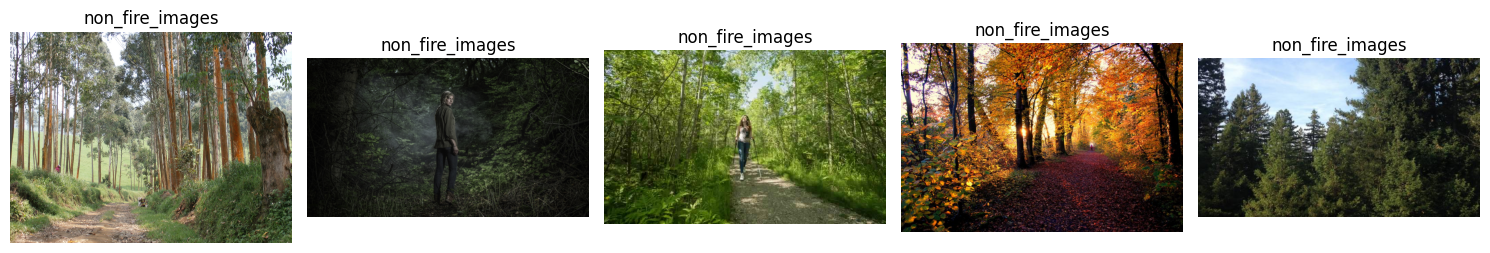

In [ ]:
from PIL import Image

def show_samples(class_name, n=5):
    folder = os.path.join(base_path, class_name)
    images = os.listdir(folder)[:n]

    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(images):
        img = Image.open(os.path.join(folder, img_name))
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_samples("fire_images")

show_samples("non_fire_images")


In [ ]:
def image_shapes(folder):
    shapes = []
    folder_path = os.path.join(base_path, folder)
    for img_name in os.listdir(folder_path):
        with Image.open(os.path.join(folder_path, img_name)) as img:
            shapes.append(img.size)
    return shapes

import numpy as np

fire_shapes = image_shapes("fire_images")
non_fire_shapes = image_shapes("non_fire_images")

print("Unique image sizes in fire_images:", np.unique(fire_shapes, axis=0))
print("Unique image sizes in non_fire_images:", np.unique(non_fire_shapes, axis=0))


Unique image sizes in fire_images: [[ 185  247]
 [ 212  280]
 [ 220  147]
 [ 235  279]
 [ 250  178]
 [ 250  187]
 [ 289  401]
 [ 292  172]
 [ 293  165]
 [ 300  180]
 [ 300  201]
 [ 305  228]
 [ 305  305]
 [ 305  460]
 [ 307  173]
 [ 312  400]
 [ 320  180]
 [ 320  496]
 [ 323  242]
 [ 350  233]
 [ 360  240]
 [ 375  281]
 [ 380  200]
 [ 385  367]
 [ 390  270]
 [ 390  275]
 [ 390  280]
 [ 390  300]
 [ 396  223]
 [ 400  225]
 [ 400  261]
 [ 400  267]
 [ 400  270]
 [ 400  272]
 [ 400  400]
 [ 400  600]
 [ 410  275]
 [ 425  240]
 [ 446  653]
 [ 448  300]
 [ 448  336]
 [ 450  338]
 [ 458  276]
 [ 458  305]
 [ 460  258]
 [ 460  260]
 [ 470  313]
 [ 480  240]
 [ 480  270]
 [ 480  319]
 [ 480  320]
 [ 480  360]
 [ 480  751]
 [ 481  662]
 [ 495  330]
 [ 500  282]
 [ 500  319]
 [ 500  320]
 [ 500  333]
 [ 500  334]
 [ 500  375]
 [ 500  500]
 [ 500  611]
 [ 509  678]
 [ 512  341]
 [ 512  384]
 [ 520  340]
 [ 520  347]
 [ 525  350]
 [ 530  298]
 [ 532  299]
 [ 534  401]
 [ 550  309]
 [ 554 1199]
 [ 

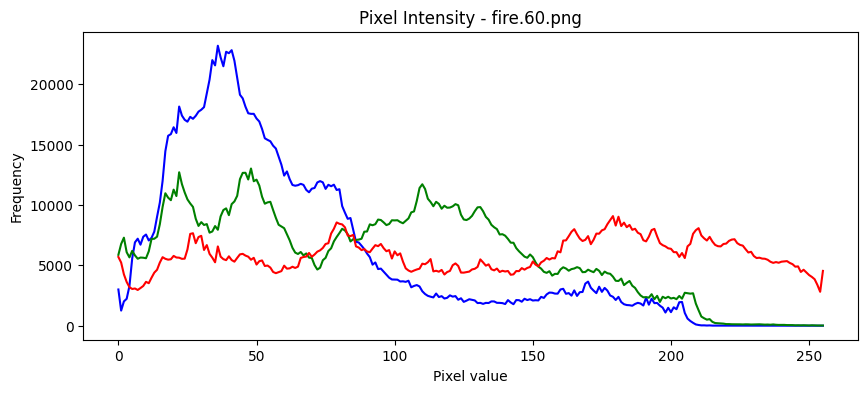

In [ ]:
import cv2

def pixel_histogram(image_path):
    img = cv2.imread(image_path)
    color = ('b', 'g', 'r')
    plt.figure(figsize=(10, 4))
    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(f"Pixel Intensity - {os.path.basename(image_path)}")
    plt.xlabel("Pixel value")
    plt.ylabel("Frequency")
    plt.show()

fire_image_path = os.path.join(base_path, "fire_images", "fire.60.png")
pixel_histogram(fire_image_path)


In [ ]:
def average_color(folder):
    folder_path = os.path.join(base_path, folder)
    total_rgb = np.zeros(3)
    count = 0

    for img_name in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, img_name)).convert('RGB')
        np_img = np.array(img)
        total_rgb += np_img.mean(axis=(0, 1))
        count += 1

    return total_rgb / count

fire_avg = average_color("fire_images")
non_fire_avg = average_color("non_fire_images")

print("Average RGB for fire_images:", fire_avg)
print("Average RGB for non_fire_images:", non_fire_avg)


Average RGB for fire_images: [114.70950126  74.38554518  50.25990727]
Average RGB for non_fire_images: [85.4811091  93.21073157 64.50283302]


In [ ]:
def check_corrupt(folder):
    folder_path = os.path.join(base_path, folder)
    corrupt = []
    for img_name in os.listdir(folder_path):
        try:
            img = Image.open(os.path.join(folder_path, img_name))
            img.verify()
        except:
            corrupt.append(img_name)
    return corrupt

print("Corrupt in fire_images:", check_corrupt("fire_images"))
print("Corrupt in non_fire_images:", check_corrupt("non_fire_images"))


Corrupt in fire_images: []
Corrupt in non_fire_images: []
